In [61]:
# import library
import re
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

# Data Manipulation
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline


In [62]:
# load data
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')
sample_data = pd.read_csv('datasets/sample_submission.csv')

In [63]:
train_data.head(20)

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1
5,a043780c757966243779bf3c0d11bf6eef721971,I can’t give you advice about Lemtrada because...,cladribine,2
6,be5a13376933a7f9bbf8e801c31691092f63260a,Reply posted for JessZidek. Hi Jess Sorry to r...,humira,0
7,08c3c0c702fc97d290204b37798ac62005da5626,Well as expected my Neurologist wants me to st...,gilenya,2
8,8fd3d7ad80791c9343e5cf8a83bd1adf6577d516,Why do you think that FIngolimod was such a mi...,fingolimod,1
9,793c5af7cc8332df17eb602247d886fbd1c80f89,Thank you so much…I’m learning a lot here at G...,tagrisso,2


In [64]:
test_data.head()

,unique_hash,text,drug
0,9e9a8166b84114aca147bf409f6f956635034c08,"256 (previously stable on natalizumab), with 5...",fingolimod
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,On fingolimod and have been since December 201...,fingolimod
2,50b6d851bcff4f35afe354937949e9948975adf7,Apparently it's shingles! :-/ I do have a few ...,humira
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,If the Docetaxel doing once a week x3 weeks th...,tagrisso
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,"CC, Stelara worked in a matter of days for me....",stelara


In [65]:
sample_data.head()

,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,0
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,0
2,50b6d851bcff4f35afe354937949e9948975adf7,0
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,0
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,0


In [66]:
train_data.text[0]

'Autoimmune diseases tend to come in clusters. As for Gilenya – if you feel good, don’t think about it, it won’t change anything but waste your time and energy. I’m taking Tysabri and feel amazing, no symptoms (other than dodgy color vision, but I’ve had it since always, so, don’t know) and I don’t know if it will last a month, a year, a decade, ive just decided to enjoy the ride, no point in worrying.'

In [67]:
train_data.text[20]

'BMC Ophthalmol. 2019 Jan 8;19(1):8. Intravitreal dexamethasone implants versus intravitreal anti-VEGF treatment in treating patients with retinal vein occlusion: a meta-analysis. Gao L et al. Background : Retinal vein occlusion (RVO) is a common retinal venous disorder that causes vision loss. No specific therapy has been developed. Controversy exists regarding two treatments: intravitreal dexamethasone implants and anti-vascular endothelial growth factor (VEGF). The goal of this study is to compare the effectiveness and safety of dexamethasone implants and anti-VEGF treatment for RVO. Methods : The PubMed, Embase, and Cochrane Library databases were searched for studies comparing dexamethasone implants with anti-VEGF in patients with RVO. Best-corrected visual acuity (BCVA), central subfield thickness (CST), intraocular pressure changes, conjunctival haemorrhage, reduced VA, and macular oedema were extracted from the final included studies. RevMan 5.3 was used to conduct the quantita

In [68]:
train_data.shape

(5279, 4)

In [69]:
test_data.shape

(2924, 3)

In [70]:
# join train & test data for convenience
data_raw = train_data.append(test_data, ignore_index = True, sort = False)

In [71]:
data_raw.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2.0
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2.0
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2.0
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2.0
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1.0


In [72]:
data_raw.shape

(8203, 4)

In [73]:
data_raw.drug.head()

0       gilenya
1       gilenya
2    fingolimod
3       ocrevus
4       gilenya
Name: drug, dtype: object

In [14]:
data_raw.drug.value_counts()

ocrevus                         978
gilenya                         977
ocrelizumab                     602
entyvio                         486
humira                          458
remicade                        403
opdivo                          354
tarceva                         344
fingolimod                      343
keytruda                        314
cladribine                      300
tagrisso                        286
stelara                         267
alimta                          229
lucentis                        114
eylea                            98
cimzia                           86
avastin                          83
nivolumab                        73
simponi                          66
crizotinib                       66
vitrectomy                       64
alectinib                        62
erlotinib                        61
tecentriq                        51
pembrolizumab                    50
osimertinib                      48
xalkori                     

In [74]:
train_data.isnull().sum()

unique_hash    0
text           0
drug           0
sentiment      0
dtype: int64

In [75]:
test_data.isnull().sum()

unique_hash    0
text           0
drug           0
dtype: int64

In [76]:
data_raw['tidy_text'] = data_raw['text'].str.replace("[^a-zA-Z#]"," ")

In [77]:
data_raw['tidy_text'] = data_raw['tidy_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))

In [78]:
data_raw.head()

,unique_hash,text,drug,sentiment,tidy_text
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2.0,Autoimmune diseases tend come clusters Gilenya...
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2.0,completely understand want results reported le...
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2.0,Interesting that only targets receptors rather...
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2.0,Very interesting grand merci wonder where lemt...
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1.0,everybody latest results Brain Cervical Cord n...


In [79]:
tokenized_text = data_raw['tidy_text'].apply(lambda x:x.split())

In [80]:
tokenized_text.head()

0    [Autoimmune, diseases, tend, come, clusters, G...
1    [completely, understand, want, results, report...
2    [Interesting, that, only, targets, receptors, ...
3    [Very, interesting, grand, merci, wonder, wher...
4    [everybody, latest, results, Brain, Cervical, ...
Name: tidy_text, dtype: object

In [104]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_text = tokenized_text.apply(lambda x: [stemmer.stem(i) for i in x])

In [105]:
tokenized_text.head()

0    [A, u, t, o, i, m, m, u, n, e,  , d, i, s, e, ...
1    [c, o, m, p, l, e, t, e, l, y,  , u, n, d, e, ...
2    [I, n, t, e, r, e, s, t, i, n, g,  , t, h, a, ...
3    [V, e, r, y,  , i, n, t, e, r, e, s, t, i, n, ...
4    [e, v, e, r, y, b, o, d, y,  , l, a, t, e, s, ...
Name: tidy_text, dtype: object

In [81]:
for i in range(len(tokenized_text)):
    tokenized_text[i] = ' '.join(tokenized_text[i])
data_raw['tidy_text'] = tokenized_text

In [106]:
data_raw['tidy_text'].head()

0    Autoimmune diseases tend come clusters Gilenya...
1    completely understand want results reported le...
2    Interesting that only targets receptors rather...
3    Very interesting grand merci wonder where lemt...
4    everybody latest results Brain Cervical Cord n...
Name: tidy_text, dtype: object

In [99]:
data_raw['word_count'] = data_raw['tidy_text'].sort_values().sum()
data_raw['word_count'].head()

0    #ClinicSpeak #MSBlog #ECF disagreement with se...
1    #ClinicSpeak #MSBlog #ECF disagreement with se...
2    #ClinicSpeak #MSBlog #ECF disagreement with se...
3    #ClinicSpeak #MSBlog #ECF disagreement with se...
4    #ClinicSpeak #MSBlog #ECF disagreement with se...
Name: word_count, dtype: object

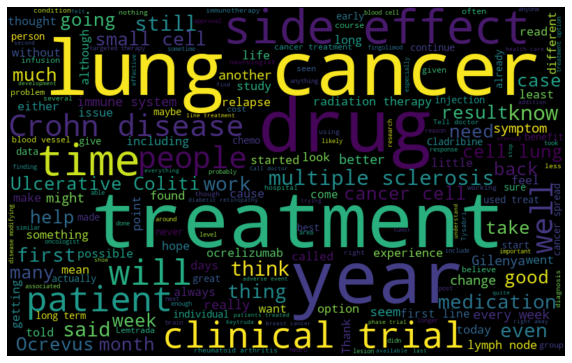

In [84]:
all_words = ' '.join([text for text in data_raw['tidy_text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words)
plt.figure(figsize = (10,7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()


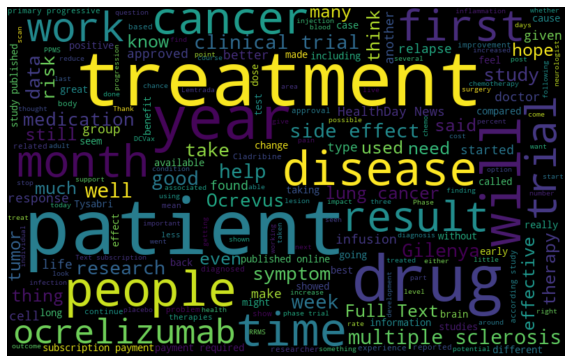

In [92]:
positive_words = ''.join([text for text in data_raw['tidy_text'][data_raw['sentiment'] == 0]])

#wordcloud = WordCloud(width = 800, 
                      #height = 500, 
                      #random_state = 21, 
                      #max_font_size = 110).generate(positive_words)

#plt.figure(figsize = (10,7))
#plt.imshow(wordcloud, interpolation = 'bilinear')
#plt.axis('off')
#plt.show()

wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(positive_words)
plt.figure(figsize = (10,7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()


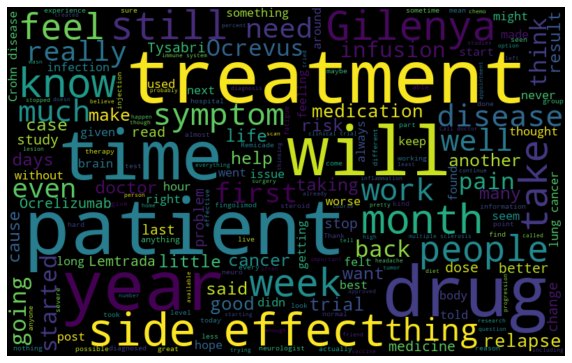

In [94]:
negative_words = ''.join([text for text in data_raw['tidy_text'][data_raw['sentiment'] == 1]])


wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(negative_words)
plt.figure(figsize = (10,7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()


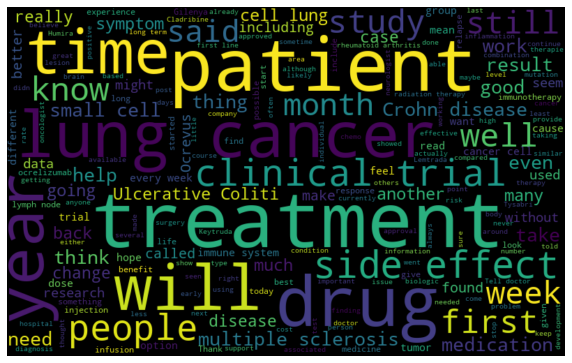

In [97]:
neutral_words = ''.join([text for text in data_raw['tidy_text'][data_raw['sentiment'] == 2]])


wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(neutral_words)
plt.figure(figsize = (10,7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()


In [103]:
data_raw['tidy_text'][20]

'Ophthalmol Intravitreal dexamethasone implants versus intravitreal anti VEGF treatment treating patients with retinal vein occlusion meta analysis Background Retinal vein occlusion common retinal venous disorder that causes vision loss specific therapy been developed Controversy exists regarding treatments intravitreal dexamethasone implants anti vascular endothelial growth factor VEGF goal this study compare effectiveness safety dexamethasone implants anti VEGF treatment Methods PubMed Embase Cochrane Library databases were searched studies comparing dexamethasone implants with anti VEGF patients with Best corrected visual acuity BCVA central subfield thickness intraocular pressure changes conjunctival haemorrhage reduced macular oedema were extracted from final included studies RevMan used conduct quantitative analysis bias assessment Results Four randomised controlled trials assessing eyes were included anti VEGF treatment showed better BCVA improvement mean difference more decreas